<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/50_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import pandas as pd
file_path = "/content/drive/MyDrive/datamining/50_Startups.csv"
housing_df = pd.read_csv(file_path)
housing_df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,NewYork,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,NewYork,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
housing_df.columns = [s.strip().replace(' ','_') for s in housing_df.columns]
housing_df.head(20)

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,NewYork,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,NewYork,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
housing_df.iloc[0:3]

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [8]:
housing_df.iloc[0:10]['Profit']
housing_df.iloc[0:10].Profit

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
6    156122.51
7    155752.60
8    152211.77
9    149759.96
Name: Profit, dtype: float64

In [11]:
housing_df.describe()

,R&D_Spend,Administration,Marketing_Spend,Profit
count,47.000000,50.000000,46.000000,50.000000
mean,76588.533617,121344.639600,223798.738478,112012.639200
std,44679.180666,28017.802755,114467.029302,40306.180338
min,542.050000,51283.140000,1903.930000,14681.400000
25%,45041.985000,103730.875000,138615.667500,90138.902500
50%,73994.560000,122699.795000,221897.880000,107978.190000
75%,108218.345000,144842.180000,302423.767500,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Data Preprocessing and Data Cleaning

In [13]:
housing_df.columns



Index(['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [14]:
cat_features = [ col for col in housing_df.columns if housing_df[col].dtype == '0']
print(cat_features)

[]


In [15]:
num_features = [col for col in housing_df.columns if  housing_df[col].dtype != '0']
print(num_features)

['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit']


In [17]:
housing_df.State = housing_df.State.astype('category')
print(housing_df.State.cat.categories)
print(housing_df.State.dtype)

Index(['California', 'Florida', 'NewYork'], dtype='object')
category


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


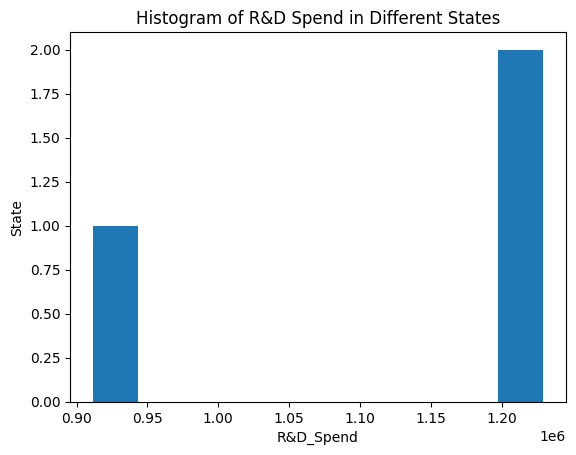

In [32]:
state_totals = housing_df.groupby('State')['R&D_Spend'].sum()
plt.hist(state_totals, bins=10)

# Set labels and title
plt.xlabel('R&D_Spend')
plt.ylabel('State')
plt.title('Histogram of R&D Spend in Different States')

# Display the plot
plt.show()

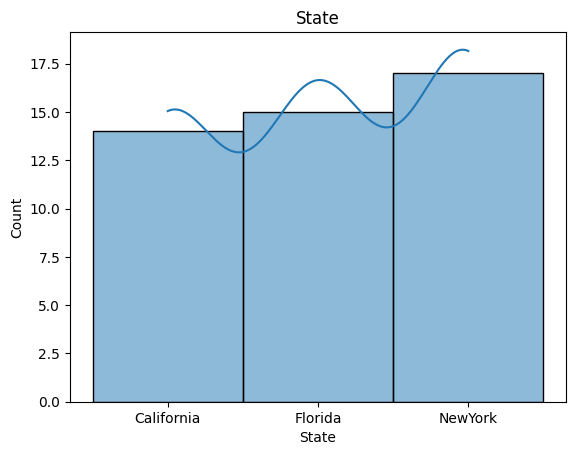

In [37]:
sns.histplot(housing_df['State'],kde= True).set(title='State')
plt.show()

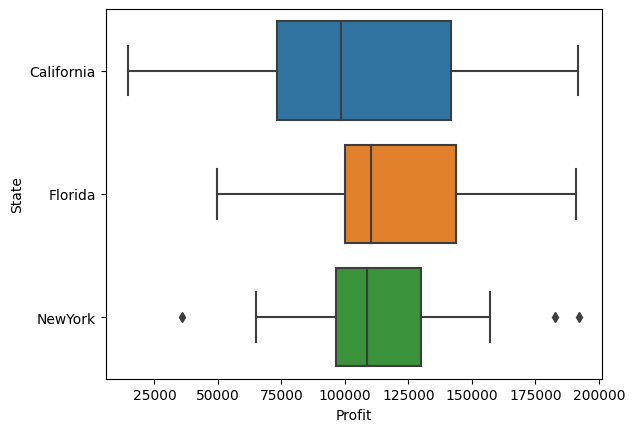

In [41]:
sns.boxplot(x = 'Profit',y = 'State', data = housing_df)
plt.show()

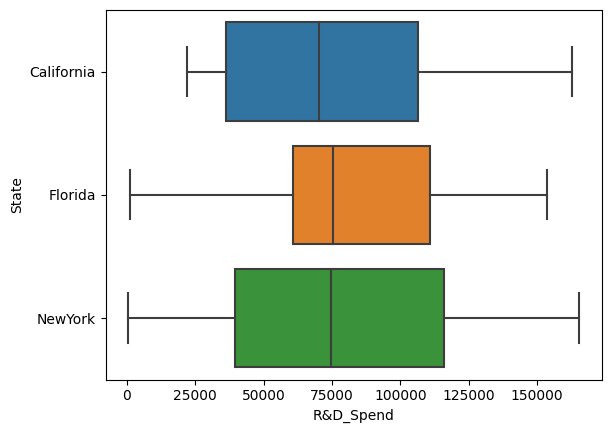

In [43]:
sns.boxplot(x = 'R&D_Spend',y = 'State', data = housing_df)
plt.show()

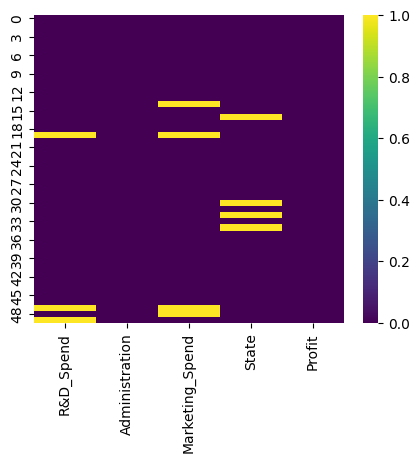

In [44]:
plt.figure(figsize =(5,4))
sns.heatmap(housing_df.isnull(), cmap ='viridis')
plt.show()

Handeling Missing value

In [51]:
medianms = housing_df ['Marketing_Spend'].median()
housing_df.Marketing_Spend == housing_df.Marketing_Spend.fillna(value = medianms)
housing_df['Marketing_Spend'].count()

46

In [56]:
median_rd = housing_df['R&D_Spend'].median()
housing_df['R&D_Spend'] = housing_df['R&D_Spend'].fillna(value=median_rd)
housing_df['R&D_Spend'].count()


50

In [58]:
mode_state = housing_df['State'].mode()[0]
housing_df['State'] = housing_df['State'].fillna(value=mode_state)
housing_df['State'].count()

50

In [60]:
median_ms = housing_df['Marketing_Spend'].median()
housing_df['Marketing_Spend'] = housing_df['Marketing_Spend'].fillna(value=median_ms)
housing_df['Marketing_Spend'].count()

50

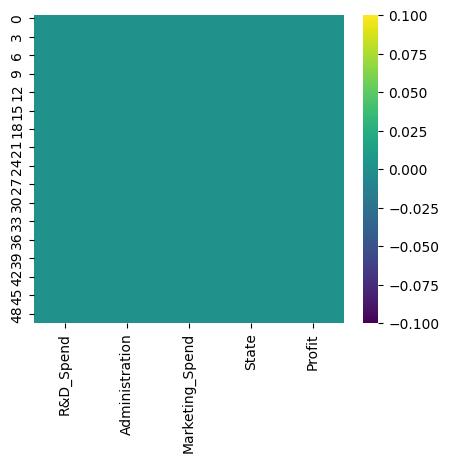

In [61]:
plt.figure(figsize =(5,4))
sns.heatmap(housing_df.isnull(), cmap ='viridis')
plt.show()

In [62]:

housing_df.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#Normalize the Data

In [88]:


from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split (housing_df, test_size = 0.3, random_state = 1)
print("Training", train_data.shape)
print("Validation:", valid_data.shape)

#training (50%), validation(30%), testing (20%)
train_data, temp = train_test_split(housing_df, test_size = 0.5, random_state =1)
train_data, temp = train_test_split(housing_df, test_size = 0.2, random_state =1)
print("Training:", train_data.shape)
print("Validation:", valid_data.shape)
print("Validation:", valid_data.shape)


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Create the list of prediction and Outcome (Target)
X = housing_df.drop(["Profit", "State"], axis = 1)
y = housing_df['Profit']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

#Model
model = LinearRegression()

#Fit the model on training data
model.fit (X_train, y_train)

LinearRegression()

,True_value(Toral_value),Predicted_value,Residual
41,77798.83,77819.050680,-20.220680
17,125370.37,127124.899924,-1754.529924
45,64926.08,51710.404529,13215.675471
24,108552.04,113508.273492,-4956.233492
23,108733.99,109477.210674,-743.220674
4,166187.94,167885.153701,-1697.213701
33,96778.92,98623.127899,-1844.207899
14,132602.65,144211.098932,-11608.448932
30,99937.59,100127.790316,-190.200316
10,146121.95,133493.979819,12627.970181


In [105]:


y_pred_train = model.predict(X_train)
result_train = pd.DataFrame({"True_value(Toral_value)": y_train,
                            "Predicted_value": y_pred_train,
                             "Residual": y_train- y_pred_train})
result_train.head(10)

,True_value(Toral_value),Predicted_value,Residual
32,97427.84,86244.849349,11182.990651
39,81005.76,83664.450584,-2658.690584
21,111313.02,123525.610880,-12212.590880
36,90708.19,83187.977882,7520.212118
19,122776.86,112582.078522,10194.781478
42,71498.49,72957.794712,-1459.304712
49,14681.40,91517.650265,-76836.250265
26,105733.54,103330.395601,2403.144399
22,110352.25,119789.264045,-9437.014045
13,134307.35,125194.391764,9112.958236


In [102]:

y_pred_test = model.predict(X_test)
result_test = pd.DataFrame({"True_value(Toral_value)": y_test,
                            "Predicted_value": y_pred_test,
                             "Residual": y_test - y_pred_test})
result_test.head(10)

,True_value(Toral_value),Predicted_value,Residual
27,105008.31,124386.305064,-19377.995064
35,96479.51,91315.007083,5164.502917
40,78239.91,79723.179402,-1483.269402
38,81229.06,73468.636515,7760.423485
2,191050.39,175124.024317,15926.365683
3,182901.99,168212.138146,14689.851854
48,35673.41,65506.066967,-29832.656967
29,101004.64,95357.736356,5646.903644
46,49490.75,77459.093985,-27968.343985
31,97483.56,90751.538092,6732.021908


In [106]:

#Model Performance for training data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

#r2_score
r2_score  = r2_score(y_train, y_pred_train)
print ("Performance score of the model on training data:", r2_score*100)

# Mean Square Error
MSE = mean_squared_error(y_train, y_pred_train)
RMSE = math.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)

#Mean Absolute Error
MAE = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error", MAE)


Performance score of the model on training data: 75.3306783956627
Root Mean Squared Error: 18522.179489143105
Mean Absolute Error 10334.759726886881


In [104]:

#Model Performance for testing data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#r2_score
r2_score  = r2_score(y_test, y_pred_test)
print ("Performance score of the model on test data:", r2_score*100)

# Mean Square Error
MSE = mean_squared_error(y_test, y_pred_test)
RMSE = math.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)

#Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error", MAE)

Performance score of the model on test data: 88.17242236123462
Root Mean Squared Error: 16381.291896544113
Mean Absolute Error 13458.233491088962
